In [25]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [26]:
import csv, sqlite3

con = sqlite3.connect("socioeconomic.db")
cur = con.cursor()

In [27]:
%sql sqlite:///socioeconomic.db

## Guardamos los datos en una tabla

In [28]:
import pandas
df = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql("chicago_data", con, if_exists='replace', index=False,method="multi")

78

In [29]:
# verificamos la creación de la tabla

%sql SELECT * FROM chicago_data limit 5;

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


### 1) Cuántas filas hay en el dataset?

In [30]:
df.describe()

# hay 78 filas

,ca,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
count,77.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,77.000000
mean,39.000000,4.920513,21.739744,15.341026,20.330769,35.717949,25597.000000,49.506494
std,22.371857,3.658981,11.457231,7.499497,11.746514,7.284421,15196.405541,28.690556
min,1.000000,0.300000,3.300000,4.700000,2.500000,13.500000,8201.000000,1.000000
25%,20.000000,2.325000,13.350000,9.200000,12.075000,32.150000,15804.750000,25.000000
50%,39.000000,3.850000,19.050000,13.850000,18.650000,38.050000,21668.500000,50.000000
75%,58.000000,6.800000,29.150000,20.000000,26.600000,40.500000,28715.750000,74.000000
max,77.000000,15.800000,56.500000,35.900000,54.800000,51.500000,88669.000000,98.000000


In [31]:
# otra opción sería con count(*)

%sql SELECT COUNT(*) FROM chicago_data;

 * sqlite:///socioeconomic.db
Done.


COUNT(*)
78


### 2) Cuántas áreas comunitarias tienen un índice de privación mayor que 50?

In [32]:
%sql SELECT COUNT('ca') FROM chicago_data WHERE hardship_index > 50;

# 38 áreas tienen un índice mayor a 50.

 * sqlite:///socioeconomic.db
Done.


COUNT('ca')
38


### 3) Cuál es el valor máximo de índice de privación?

In [33]:
# opción 1: podemos verlo en el método describe usado anteriormente
# la respuesta sería 98.

# otra opción es:

%sql SELECT MAX(hardship_index) FROM chicago_data;

 * sqlite:///socioeconomic.db
Done.


MAX(hardship_index)
98.0


### 4) Qué área comunitaria de Chicago tiene el índice más alto?

In [34]:

%sql SELECT community_area_name FROM chicago_data WHERE hardship_index IN (SELECT MAX(hardship_index) FROM chicago_data);

 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


### 5) Qué área comunitaria tiene ingreso per cápita mayor a $60.000?

In [35]:
%sql SELECT community_area_name FROM chicago_data WHERE per_capita_income_ > 60000;

 * sqlite:///socioeconomic.db
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


### 6) Crea un scatter plot con las variables per_capita_income_ y hardship_index.

<Axes: xlabel='per_capita_income_', ylabel='hardship_index'>

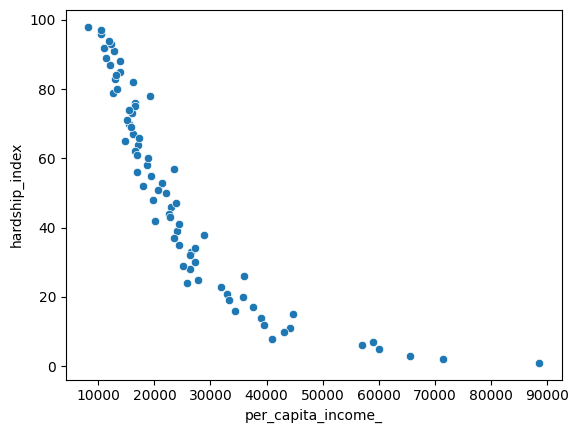

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.scatterplot(x= 'per_capita_income_', y= 'hardship_index', data= df)


El diagrama de dispersión muestra una correlación negativa entre las variables graficadas : a menor ingreso per cápita podemos esperar un mayor índice de privación. 

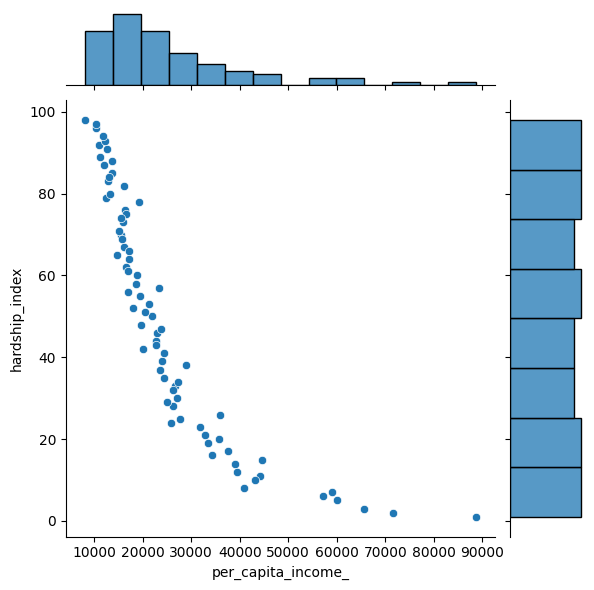

In [42]:
sns.jointplot(x='per_capita_income_',y='hardship_index', data=df)

### Histograma conjunto de las variables percent_aged_16_unemployed y percent_households_below_poverty

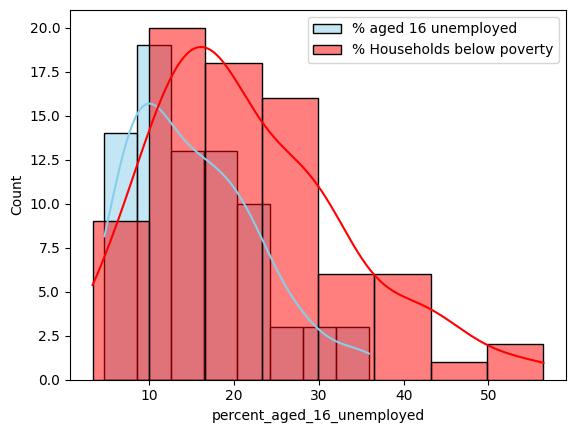

In [45]:
sns.histplot(data=df, x="percent_aged_16_unemployed", color="skyblue", label="% aged 16 unemployed", kde=True)
sns.histplot(data=df, x="percent_households_below_poverty", color="red", label="% Households below poverty", kde=True)

plt.legend() 
plt.show()

Ambos histogramas tienen un comportamiento muy similar, lo que indica una posible correlación positiva.
Lo comprobaremos con una scatter plot.

### Bubble plot entre 3 variables

<Axes: xlabel='percent_households_below_poverty', ylabel='percent_aged_16_unemployed'>

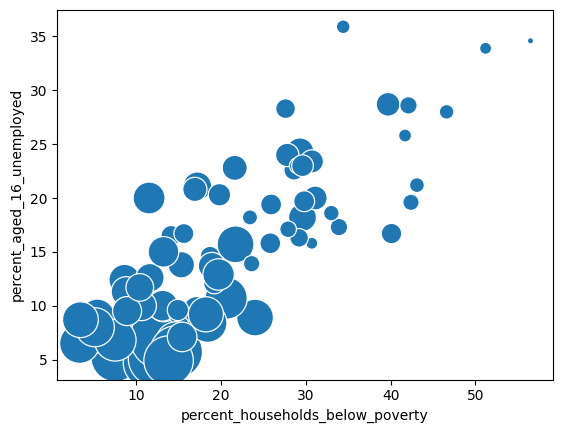

In [50]:
sns.scatterplot(data=df, x="percent_households_below_poverty", y="percent_aged_16_unemployed", size="per_capita_income_", legend=False, sizes=(20, 2000))



El diagrama de dispersión corrobora la correlación positiva entre las variables: a mayor porcentaje de mayores de 16 años desempleados mayor probabilidad de que el hogar se encuentre bajo la línea de la pobreza.
Añadimos al análisis la variable "Ingreso per cápita" dada por el tamaño de las burbujas. Las de mayor tamaño se encuentran más cercanas al origen de los ejes, lo que indica una relación negativa con las otras dos variables analizadas. Ante mayor sea la tasa de desempleo, mayor la pobreza y menor el ingreso per cápita.